#Project Title : **Customer Segmentation**

In [ ]:
# Importing the libraries
#Importing Pandas library for data manipulation
import pandas as pd

#Importing Numpy library for numerical analysis
import numpy as np

#Importing Matplotlib and Seaborn for visulaisations
import matplotlib.pyplot as plt
import seaborn as sns

#For disabling the warnings, importing Filterwarnings
from warnings import filterwarnings
filterwarnings('ignore')

'''For calculating point  biserial correlation coefficient between
two variables'''
from scipy.stats import pointbiserialr

**Loading the dataset**

In [ ]:
data=pd.read_csv('/content/Customers_segmentation dataset.csv')
print(data)

      Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0      58138        0         0       58       635         88   
1      46344        1         1       38        11          1   
2      71613        0         0       26       426         49   
3      26646        1         0       26        11          4   
4      58293        1         0       94       173         43   
...      ...      ...       ...      ...       ...        ...   
2200   61223        0         1       46       709         43   
2201   64014        2         1       56       406          0   
2202   56981        0         0       91       908         48   
2203   69245        0         1        8       428         30   
2204   52869        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                   6                2                 1     

In [ ]:
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
data.tail()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
2200,61223,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0
2204,52869,1,1,40,84,3,61,2,1,21,...,0,0,0,0,0,0,1,151,130,0


In [ ]:
#Checking the shape
data.shape

(2205, 39)

In [ ]:
#checking the columns
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [ ]:
#Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Income                2205 non-null   int64
 1   Kidhome               2205 non-null   int64
 2   Teenhome              2205 non-null   int64
 3   Recency               2205 non-null   int64
 4   MntWines              2205 non-null   int64
 5   MntFruits             2205 non-null   int64
 6   MntMeatProducts       2205 non-null   int64
 7   MntFishProducts       2205 non-null   int64
 8   MntSweetProducts      2205 non-null   int64
 9   MntGoldProds          2205 non-null   int64
 10  NumDealsPurchases     2205 non-null   int64
 11  NumWebPurchases       2205 non-null   int64
 12  NumCatalogPurchases   2205 non-null   int64
 13  NumStorePurchases     2205 non-null   int64
 14  NumWebVisitsMonth     2205 non-null   int64
 15  AcceptedCmp3          2205 non-null   int64
 16  Accept

In [ ]:
#Checking the duplicates values
data.duplicated().sum()

184

There is **184** duplicate values in this dataset.

In [ ]:
#Checking the null values
data.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

**There is no null values in this dataset.**

In [ ]:
#Checking the unique values in the dataset
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

**There is two columns(Z_CostContact and Z_Revenue) that have the same values and we can drop it
because it can not help us for analysing the data.**

In [ ]:
data.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

In [ ]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [ ]:
#Discriptive Statistical for columns
Total_income=data['Income'].sum()
print(Total_income)

113826719


In [ ]:
#Checking Skewness of the data
data.skew()

Income                   0.013164
Kidhome                  0.635495
Teenhome                 0.404623
Recency                 -0.001874
MntWines                 1.166917
MntFruits                2.099281
MntMeatProducts          1.818916
MntFishProducts          1.912028
MntSweetProducts         2.098355
MntGoldProds             1.834468
NumDealsPurchases        2.312369
NumWebPurchases          1.201376
NumCatalogPurchases      1.368122
NumStorePurchases        0.706960
NumWebVisitsMonth        0.229994
AcceptedCmp3             3.259123
AcceptedCmp4             3.246508
AcceptedCmp5             3.284676
AcceptedCmp1             3.551642
AcceptedCmp2             8.402967
Complain                10.363651
Response                 1.950559
Age                      0.089941
Customer_Days           -0.019176
marital_Divorced         2.590858
marital_Married          0.463015
marital_Single           1.378865
marital_Together         1.109366
marital_Widow            5.107283
education_2n C

In [ ]:
#Check kurtosis
data.kurt()

Income                   -0.847564
Kidhome                  -0.789442
Teenhome                 -0.989633
Recency                  -1.198443
MntWines                  0.574909
MntFruits                 4.050778
MntMeatProducts           3.248138
MntFishProducts           3.056338
MntSweetProducts          4.079829
MntGoldProds              3.143759
NumDealsPurchases         8.186671
NumWebPurchases           4.101823
NumCatalogPurchases       3.210414
NumStorePurchases        -0.635247
NumWebVisitsMonth         1.904398
AcceptedCmp3              8.629707
AcceptedCmp4              8.547565
AcceptedCmp5              8.797075
AcceptedCmp1             10.623796
AcceptedCmp2             68.672133
Complain                105.500953
Response                  1.806319
Age                      -0.797036
Customer_Days            -1.202857
marital_Divorced          4.716821
marital_Married          -1.787239
marital_Single           -0.098821
marital_Together         -0.770007
marital_Widow       

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

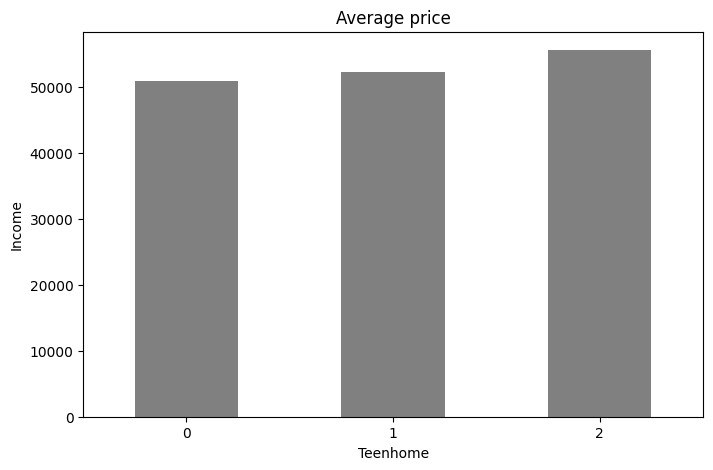

In [ ]:
Avg_price=data.groupby('Teenhome')['Income'].mean()
plt.figure(figsize=(8,5))
Avg_price.plot(kind='bar',color='grey')
plt.title('Average price')
plt.xlabel('Teenhome')
plt.ylabel('Income')
plt.xticks(rotation=0)

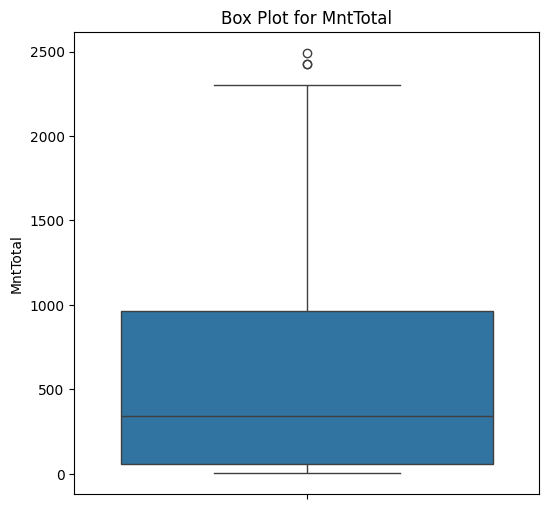

In [ ]:
#Box plot for total amount for all products
plt.figure(figsize=(6,6))
sns.boxplot(data=data,y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

#**Outliers**

In [ ]:
Q1 = data['MntTotal'].quantile(0.25)
Q2=data['MntTotal'].quantile(0.50)
IQR = Q2-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q2 + 1.5*IQR
outliers = data[(data['MntTotal']<lower_bound) | (
    data['MntTotal']>upper_bound
)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
11,63033,0,0,82,194,61,480,225,112,30,...,0,0,0,0,1,0,0,1072,1042,0
14,82800,0,0,23,1006,22,115,59,68,45,...,0,0,0,0,0,0,1,1270,1225,2
17,76995,0,1,91,1012,80,498,0,16,176,...,0,0,0,0,0,1,0,1606,1430,1
20,2447,1,0,42,1,1,1725,1,1,1,...,0,0,0,0,1,0,0,1729,1728,0


In [ ]:
#Removing Outliers
data=data[(data['MntTotal']>lower_bound)|(data['MntTotal']>
                                          upper_bound)]
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


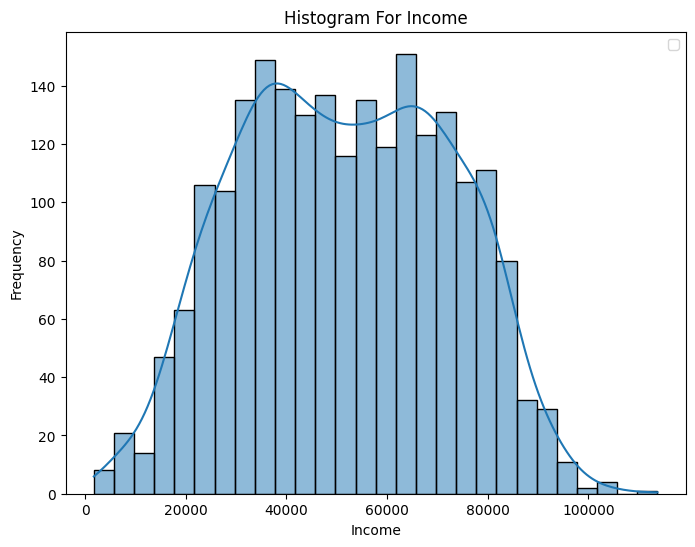

In [ ]:
#Plotting Histogram
plt.figure(figsize=(8,6))
sns.histplot(data=data, x='Income',bins=28,kde=True)
plt.title('Histogram For Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()

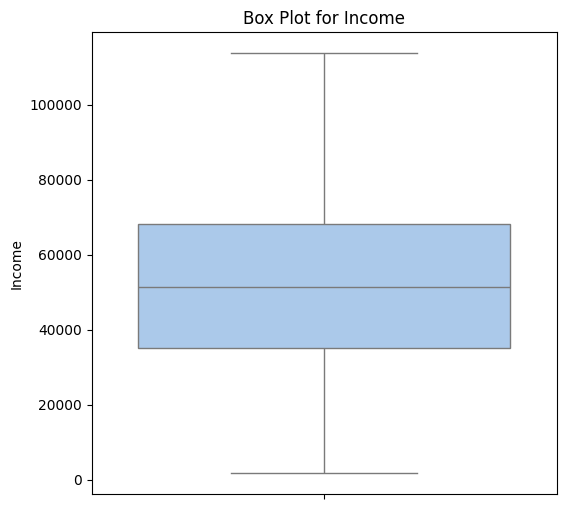

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(data=data,y='Income',palette='pastel')
plt.title('Box Plot for Income')
plt.ylabel('Income')
plt.show()

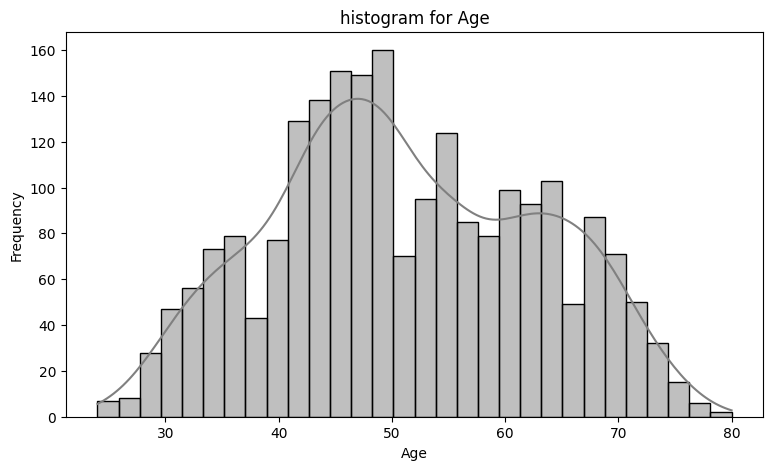

In [ ]:
#Histogram plot for age
plt.figure(figsize=(9,5))
sns.histplot(data=data,x='Age',bins=30,kde=True,color='grey')

plt.title('histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#**K-means**

1. Standardising data

2. Principal Component Analysis

3. Silhouette score analysis

4. Elbow method

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#Standardising data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_cluster = ['Income','MntTotal']
data_scaled = data.copy()
data_scaled[cols_for_cluster]= scaler.fit_transform(data[
                       cols_for_cluster])
data_scaled[cols_for_cluster].describe()

,Income,MntTotal
count,2.205000e+03,2.205000e+03
mean,2.255691e-17,-3.705778e-17
std,1.000227e+00,1.000227e+00
min,-2.409272e+00,-9.704038e-01
25%,-7.932106e-01,-8.800957e-01
50%,-1.618161e-02,-3.816642e-01
75%,8.044529e-01,6.968235e-01
max,2.999363e+00,3.348757e+00


**The standard deviation and mean for all columns is varying between 1 and 0. And all the data points are replaced their z-scores.**

In [ ]:
#Principal Component Analysis
from sklearn import decomposition
Pca=decomposition.PCA(n_components=2)
Pca_res=Pca.fit_transform(data_scaled[cols_for_cluster])
data_scaled['Pc1']=Pca_res[:,0]
data_scaled['Pc2']=Pca_res[:,1]

**--->PCA technique is for dimensionality reduction.It takes original data and creates new features that capture the most variance of the data.**

In [ ]:
#Elbow method
X=data_scaled[cols_for_cluster]
inertia_list=[]
for K in range(2,8):
  inertia=KMeans(n_clusters=K, random_state=8).fit(X).inertia_
  inertia_list.append(inertia)



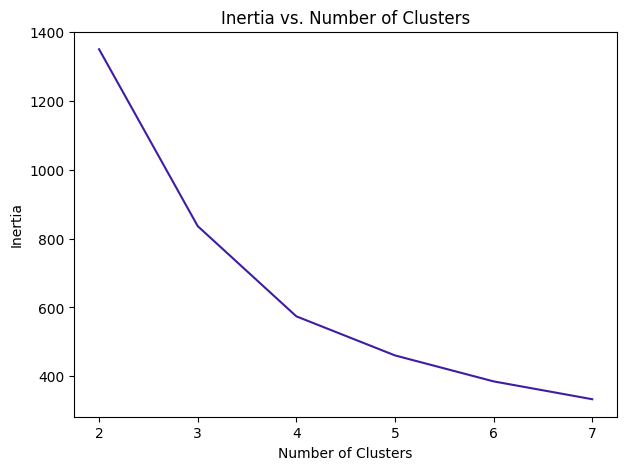

In [ ]:
plt.figure(figsize=[7,5])
plt.plot(range(2,8),inertia_list,color=(54/220,25/225,130/200))
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

**ElboW method is used to determine the optimal number of clusters(K)
for K-Means**

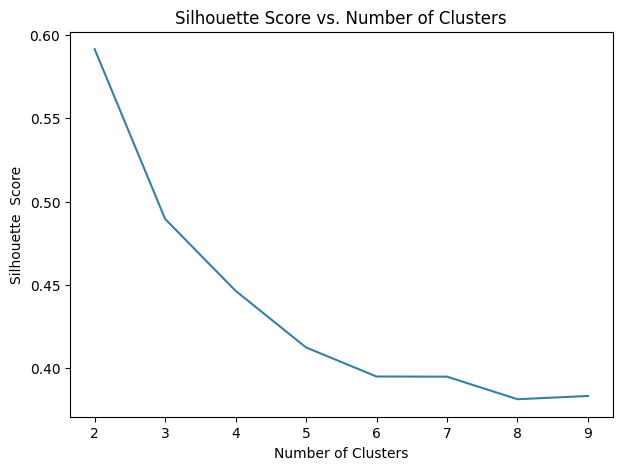

In [ ]:
#Silhouette score analysis
from sklearn.metrics import silhouette_score
silhouette_list=[]
for K in range(2,10):
  model=KMeans(n_clusters=K, random_state=7)
  clusters=model.fit_predict(X)
  s_average = silhouette_score(X,clusters)
  silhouette_list.append(s_average)

plt.figure(figsize=[7,5])
plt.plot(range(2,10),silhouette_list, color=(54/255,113/225,130/200))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette  Score")
plt.show()

**Silhouette score shows the quality of clustering. Higher silhouette score
inicates that the clusters are seperated and lower silhouette score indicates that some of them are collided or overlaped.**

Text(0, 0.5, 'Pc2')

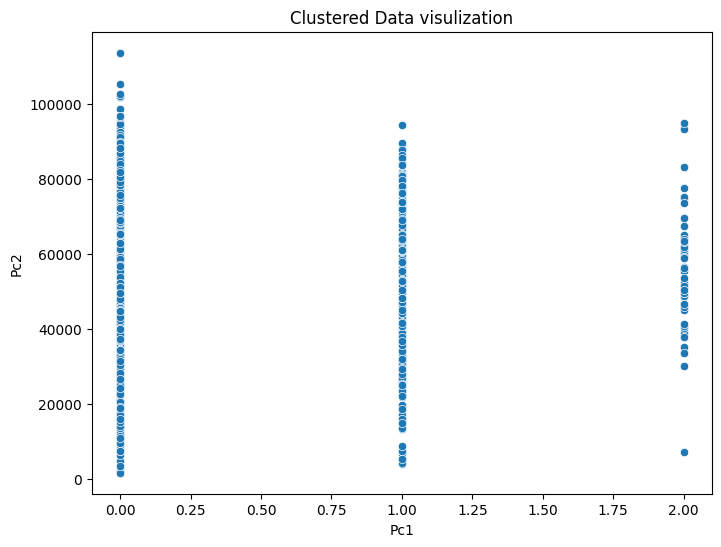

In [ ]:
#scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Teenhome',y='Income',
                            palette='viridis')
plt.title('Clustered Data visulization')
plt.xlabel('Pc1')
plt.ylabel('Pc2')



#**Recommendations**

If we see on the clusters side then on this customers have different interests and product preference.

**Marketing Strategies for Cluster**

Cluster 0: High value customers in relationship

Cluster 1 : Low value have single customers

Cluster 2: High value also have single customers

Cluster 3. Low value also have customers in relationship